In [7]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
import altair as alt

In [8]:
df_players = pd.read_csv('https://raw.githubusercontent.com/Ocisluvy/IS525Final/main/NBA.csv?token=GHSAT0AAAAAAB22QYTGUHVXRRZ6PP2NREOQY4EOJFQ', 
                 delimiter=";", encoding="latin-1")

In [9]:
df_players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,12,0,20.4,3.0,7.7,...,0.848,2.0,5.0,7.0,1.3,0.2,0.6,1.3,1.6,8.8
1,2,Steven Adams,C,29,MEM,15,15,26.0,2.9,4.7,...,0.257,4.9,5.8,10.7,2.4,0.7,1.1,2.3,2.7,6.5
2,3,Bam Adebayo,C,25,MIA,14,14,35.0,7.4,14.0,...,0.855,2.4,6.7,9.1,3.4,1.2,0.8,3.6,3.4,19.1
3,4,Ochai Agbaji,SG,22,UTA,6,0,11.2,1.3,3.2,...,0.571,0.7,1.0,1.7,0.2,0.0,0.0,0.0,1.0,3.3
4,5,Santi Aldama,PF,22,MEM,16,14,27.3,3.8,8.1,...,0.679,1.8,4.5,6.3,0.9,0.9,1.1,0.6,2.7,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,460,Delon Wright,PG,30,WAS,4,0,22.8,2.5,6.0,...,0.600,1.0,1.5,2.5,3.3,2.8,1.0,1.0,1.3,6.5
460,461,McKinley Wright IV,PG,24,DAL,1,0,5.0,1.0,4.0,...,0.000,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0
461,462,Thaddeus Young,PF,34,TOR,14,4,16.4,2.3,4.1,...,0.800,1.8,2.0,3.8,1.6,1.1,0.1,0.6,1.6,5.2
462,463,Trae Young,PG,24,ATL,15,15,35.2,8.8,22.3,...,0.896,0.9,2.4,3.3,9.5,0.9,0.2,3.3,1.4,27.3


In [27]:
df_players["Pos"].unique().tolist()

['C', 'SG', 'PF', 'PG', 'SF']

In [10]:
df_team = df_players.groupby('Tm').agg({'3PA':'sum','3P':'sum','2PA':'sum','2P':'sum','FGA':'sum','STL':'sum','BLK':'sum','PF':'sum','TOV':'sum'})
df_team = df_team.reset_index()
df_team

,Tm,3PA,3P,2PA,2P,FGA,STL,BLK,PF,TOV
0,ATL,30.5,10.0,70.5,37.0,101.1,7.5,5.1,22.3,12.9
1,BOS,48.2,18.7,52.4,30.0,100.7,7.1,6.5,24.7,15.5
2,BRK,42.6,15.1,66.6,35.9,109.0,9.8,8.5,28.9,17.7
3,CHI,34.3,11.7,65.0,33.9,99.4,8.8,5.9,23.0,16.6
4,CHO,49.8,16.1,79.5,41.0,129.1,10.2,6.8,27.6,20.8
5,CLE,39.8,15.8,68.4,35.2,107.9,7.7,5.9,26.5,16.9
6,DAL,47.9,16.0,56.2,31.7,104.1,11.4,3.7,25.5,14.5
7,DEN,36.5,14.9,65.9,34.7,102.6,8.3,4.2,22.3,17.6
8,DET,42.7,13.7,71.6,35.4,114.2,9.1,5.4,31.0,17.7
9,GSW,50.9,18.9,56.2,31.8,107.0,8.4,4.5,29.6,19.9


In [11]:
df_team['3PAR'] = df_team['3P']/df_team['3PA']
df_team['2PAR'] = df_team['2P']/df_team['2PA']
df_team

,Tm,3PA,3P,2PA,2P,FGA,STL,BLK,PF,TOV,3PAR,2PAR
0,ATL,30.5,10.0,70.5,37.0,101.1,7.5,5.1,22.3,12.9,0.327869,0.524823
1,BOS,48.2,18.7,52.4,30.0,100.7,7.1,6.5,24.7,15.5,0.387967,0.572519
2,BRK,42.6,15.1,66.6,35.9,109.0,9.8,8.5,28.9,17.7,0.354460,0.539039
3,CHI,34.3,11.7,65.0,33.9,99.4,8.8,5.9,23.0,16.6,0.341108,0.521538
4,CHO,49.8,16.1,79.5,41.0,129.1,10.2,6.8,27.6,20.8,0.323293,0.515723
5,CLE,39.8,15.8,68.4,35.2,107.9,7.7,5.9,26.5,16.9,0.396985,0.514620
6,DAL,47.9,16.0,56.2,31.7,104.1,11.4,3.7,25.5,14.5,0.334029,0.564057
7,DEN,36.5,14.9,65.9,34.7,102.6,8.3,4.2,22.3,17.6,0.408219,0.526555
8,DET,42.7,13.7,71.6,35.4,114.2,9.1,5.4,31.0,17.7,0.320843,0.494413
9,GSW,50.9,18.9,56.2,31.8,107.0,8.4,4.5,29.6,19.9,0.371316,0.565836


In [12]:
df_style = df_team[['Tm','2PA','3PA']]
team_list = df_style['Tm'].tolist()
_3PA_list = df_style['3PA'].tolist()
_2PA_list = df_style['2PA'].tolist()
for i in range(len(team_list)):
    team_list[i] = team_list[i] + '.png'

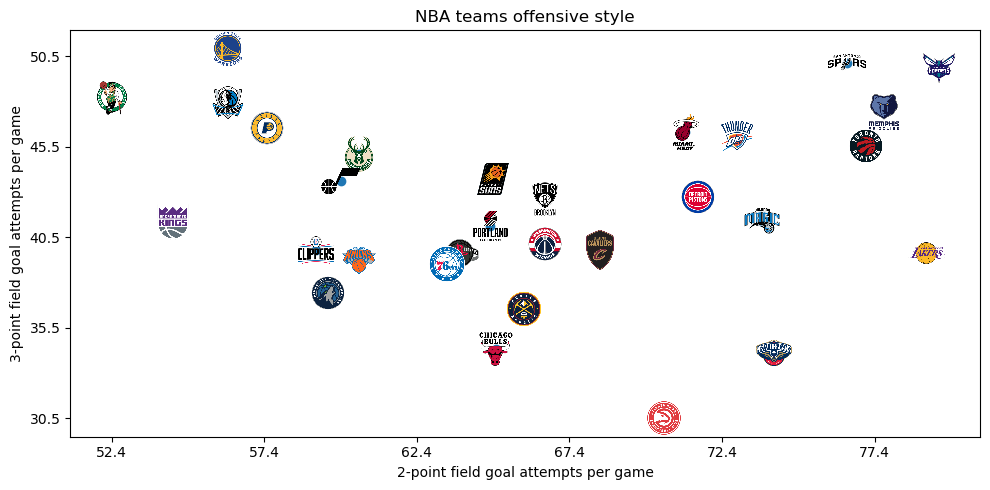

In [43]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True


def getImage(path):
   return OffsetImage(plt.imread(path, format="png"), zoom=.1)

paths = team_list
x = _2PA_list
y = _3PA_list
fig, ax = plt.subplots()
ax.scatter(x, y) 
for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
plt.xticks(np.arange(min(x), max(x)+1, 5))
plt.yticks(np.arange(min(y), max(y)+1, 5))
plt.title("NBA teams offensive style")
plt.xlabel("2-point field goal attempts per game")
plt.ylabel("3-point field goal attempts per game")
plt.show()

In [14]:
# import plotly.express as px

In [15]:
# statistic = ['PTS', 'TRB', 'AST', 'STL', 'BLK']

In [16]:
# fig = px.scatter(df_players, x='PTS', y='AST', color="Pos", hover_data = ['Player'])
# fig.show()

In [28]:
position = df_players["Pos"].unique().tolist()

In [42]:
ys = ['TRB', 'AST','STL','BLK']

select_box = alt.binding_select(options=ys, name='Supplementary Data ')
sel_y = alt.selection_single(fields=['Supplementary Data '], bind=select_box, init={'Supplementary Data ': 'TRB'})


chart = alt.Chart(df_players).transform_fold(
    ys,
    as_ = ['Supplementary Data ', 'Supplementary Data']
).mark_point().encode(
    x='PTS:Q',
    y='Supplementary Data:Q',
    tooltip='Player',
    color="Pos"
).add_selection(
    sel_y,
).transform_filter(
    sel_y
).transform_filter(
    alt.FieldOneOfPredicate(
    field='Pos', oneOf=position)
).interactive()

dif_postion = alt.binding_radio(options=position)

position_select = alt.selection_single(fields=['Pos'], bind=dif_postion, name="Player")
position_color_condition = alt.condition(position_select,
                      alt.Color('Pos:N', legend=None),
                      alt.value('lightgray'))

highlight_ratings = chart.add_selection(
    position_select
).encode(
    color=position_color_condition
).properties(title="Position Highlighting")

line = pd.DataFrame({
    ' ': [0, 35],
    '  ':[0, 13]
})

line_plot = alt.Chart(line).mark_line(color= 'red').encode(
    x = ' ',
    y = '  '
)

highlight_ratings+line_plot

alt.LayerChart(...)